#### This notebook is to apply Load, Clean, Explore, Viualize the sample dataset from Kaggle

#### 1. Load and Clean data

In [78]:
# pip install matplotlib

In [79]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
#load csv

df = pd.read_csv('household_power_consumption.txt', delimiter=';')

C:\Users\minh.chau\AppData\Local\Temp\ipykernel_30340\3349360122.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', delimiter=';')


In [7]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
# describe
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [12]:
# concat and convert datetime and numeric columns
df['DateTime'] = df.Date + ' ' + df.Time


In [14]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

C:\Users\minh.chau\AppData\Local\Temp\ipykernel_30340\2138640164.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [36]:
# convert to numeric, assign NaN if not valid
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors='coerce' )

In [38]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime'],
      dtype='object')

In [39]:
tarCols = ['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']
for col in tarCols:
    df[col] = pd.to_numeric(df[col],errors='coerce' )

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 158.3+ MB


In [56]:
df = df.dropna()

In [57]:
df.isna().sum().sum()

0

#### 2. Feature Engineering and Aggregation

In [59]:
df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.day_name()
df['date'] = df['DateTime'].dt.date

C:\Users\minh.chau\AppData\Local\Temp\ipykernel_30340\2380346735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['DateTime'].dt.hour
C:\Users\minh.chau\AppData\Local\Temp\ipykernel_30340\2380346735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['DateTime'].dt.day_name()
C:\Users\minh.chau\AppData\Local\Temp\ipykernel_30340\2380346735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [60]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,hour,dayofweek,date
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,Saturday,2006-12-16
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,Saturday,2006-12-16
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,Saturday,2006-12-16
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,Saturday,2006-12-16
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,Saturday,2006-12-16


In [68]:
# aggregation
daily = df.groupby('date')['Global_active_power'].sum().reset_index()
hourly = df.groupby(['date','hour'])['Global_active_power'].mean().reset_index()

In [86]:
print(daily)

            date  Global_active_power
0     2006-12-16             1209.176
1     2006-12-17             3390.460
2     2006-12-18             2203.826
3     2006-12-19             1666.194
4     2006-12-20             2225.748
...          ...                  ...
1428  2010-11-22             2041.536
1429  2010-11-23             1577.536
1430  2010-11-24             1796.248
1431  2010-11-25             1431.164
1432  2010-11-26             1488.104

[1433 rows x 2 columns]


In [87]:
print(hourly)

             date  hour  Global_active_power
0      2006-12-16    17             4.222889
1      2006-12-16    18             3.632200
2      2006-12-16    19             3.400233
3      2006-12-16    20             3.268567
4      2006-12-16    21             3.056467
...           ...   ...                  ...
34163  2010-11-26    17             1.725900
34164  2010-11-26    18             1.573467
34165  2010-11-26    19             1.659333
34166  2010-11-26    20             1.163700
34167  2010-11-26    21             0.934667

[34168 rows x 3 columns]


#### 3. Visualization

<Axes: xlabel='date', ylabel='Global_active_power'>

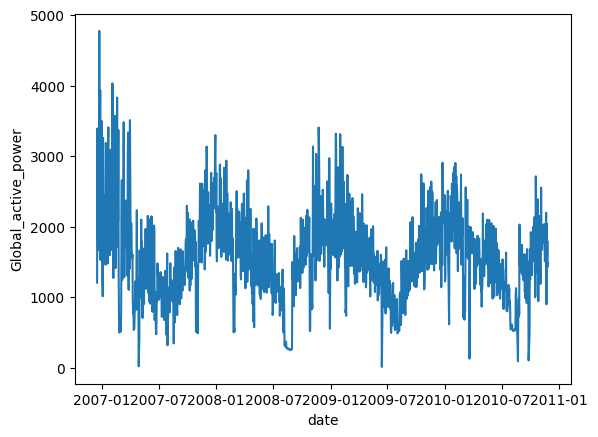

In [83]:
# daily usage line plot
# 1. Daily usage line plot
sns.lineplot(data=daily, x='date', y='Global_active_power')


<Axes: xlabel='hour', ylabel='Global_active_power'>

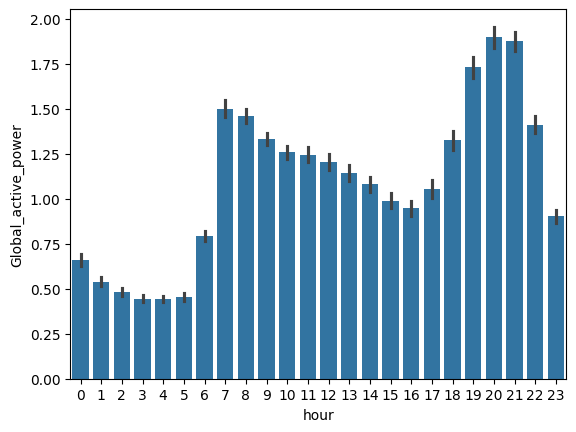

In [84]:

# 2. Avg consumption by hour
sns.barplot(data=hourly, x='hour', y='Global_active_power')


<Axes: xlabel='hour', ylabel='dayofweek'>

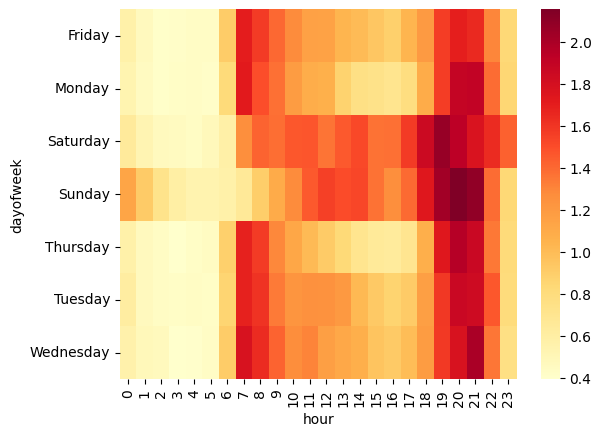

In [85]:

# 3. Heatmap: day-of-week vs hour
pivot = df.pivot_table(index='dayofweek', columns='hour',
                       values='Global_active_power', aggfunc='mean')
sns.heatmap(pivot, cmap='YlOrRd')